# Ejercicio 2 - Sistemas no lineales y modelado SIR
Michelle Mejia y Silvia Illescas

## Teor√≠a

1. Compare sistemas lineales y no lineales (p. ej., modelo SIR: Œ≤SI vs. recuperaci√≥n lineal ŒºI).
Los sistemas lineales se caracterizan porque los cambios en las variables dependen proporcionalmente de una sola variable, lo que permite que las soluciones se sumen y se comporten de manera predecible. En el modelo SIR, la recuperaci√≥n es un proceso lineal, ya que ocurre a una tasa proporcional al n√∫mero de infectados: ŒºI. En contraste, los sistemas no lineales involucran interacciones entre variables, como el t√©rmino de contagio Œ≤SI, que depende del producto entre susceptibles e infectados. Esta no linealidad produce din√°micas m√°s complejas, como curvas epid√©micas con picos, puntos de inflexi√≥n y umbrales cr√≠ticos, y hace necesario el uso de simulaciones para analizar su comportamiento.

2. Defina la fuerza de infecci√≥n (Œª = Œ≤cI/N) y su doble interpretaci√≥n:
La fuerza de infecci√≥n (Œª) es la tasa a la que un individuo susceptible se infecta, y se calcula como:

        ùúÜ = ùõΩùëêùêº/ùëÅ

donde: - Œ≤ es la probabilidad de transmisi√≥n por contacto,c es el n√∫mero promedio de contactos por persona por unidad de tiempo, I es el n√∫mero de infectados y N es la poblaci√≥n total.

a. Riesgo por susceptibilidad:
Desde esta perspectiva, Œª representa la probabilidad por unidad de tiempo de que una persona susceptible se infecte, en funci√≥n de la fracci√≥n de la poblaci√≥n que est√° infectada. Es una medida del riesgo individual de contagio.

b. Tasa de propagaci√≥n por infecci√≥n:
Desde el punto de vista de los infectados, Œª refleja la eficiencia con la que cada infectado contribuye a propagar la enfermedad. Es decir, c√≥mo la interacci√≥n entre infectados y susceptibles, modulada por los contactos y la probabilidad de transmisi√≥n, determina la expansi√≥n de la epidemia.

3. Explique por qu√© los sistemas no lineales requieren simulaci√≥n (no se requieren soluciones de forma cerrada).
Los sistemas no lineales, como el modelo SIR con el t√©rmino de contagio Œ≤SI, presentan din√°micas complejas debido a que las variables interact√∫an entre s√≠ de manera multiplicativa. Esta interdependencia hace que no sea posible obtener soluciones anal√≠ticas exactas o de ‚Äúforma cerrada‚Äù como en los sistemas lineales. Adem√°s, su comportamiento puede incluir fen√≥menos como picos, umbrales, y puntos de inflexi√≥n, que dependen fuertemente de las condiciones iniciales y los par√°metros del sistema. Por eso, se recurre a simulaciones num√©ricas, que permiten aproximar la evoluci√≥n del sistema a lo largo del tiempo y analizar distintos escenarios de forma flexible y visual.

4. Para un modelo SIR con ùëÖ0=3

a. Explique qu√© es ùëÖ0:
El n√∫mero b√°sico de reproducci√≥n, ùëÖ0, representa el n√∫mero promedio de contagios que una persona infectada genera en una poblaci√≥n completamente susceptible. Si ùëÖ0>1, la enfermedad puede propagarse; si ùëÖ0<1, la epidemia tiende a desaparecer. En este caso, un ùëÖ0=3 indica que cada infectado contagia en promedio a tres personas al inicio de la epidemia.

b. Calcule el umbral de inmunidad de grupo:
El umbral de inmunidad de grupo se calcula como:

ùêª=1‚àí1/ùëÖ0=1‚àí1/3=2/3=66.7%

Esto significa que aproximadamente el 66.7‚ÄØ% de la poblaci√≥n debe ser inmune (por vacunaci√≥n o recuperaci√≥n) para evitar una propagaci√≥n sostenida de la enfermedad.

c. Dibuje las curvas epid√©micas esperadas para S, I, R:

S (Susceptibles): Comienza alta (cerca del 100‚ÄØ%) y disminuye continuamente a medida que la poblaci√≥n se infecta.

I (Infectados): Comienza baja, crece r√°pidamente hasta un pico y luego disminuye conforme las personas se recuperan.

R (Recuperados): Comienza en cero y aumenta constantemente, ya que las personas que se recuperan pasan a esta categor√≠a.

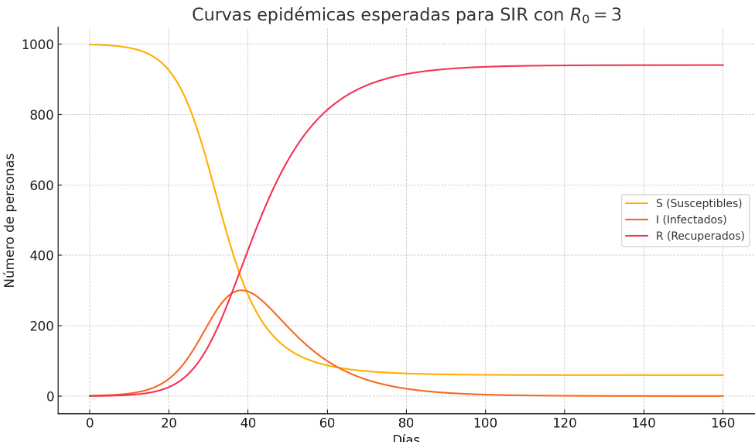


4. ¬øPor qu√© el t√©rmino Œ≤SI crea puntos de inflexi√≥n?
El t√©rmino Œ≤SI es no lineal porque depende del producto entre el n√∫mero de susceptibles (S) y el n√∫mero de infectados (I). Esta interacci√≥n produce un comportamiento cambiante en la tasa de nuevos contagios: al inicio de la epidemia, cuando hay muchos susceptibles y los infectados comienzan a aumentar, el valor de Œ≤SI tambi√©n crece, acelerando la propagaci√≥n. Sin embargo, a medida que los susceptibles disminuyen, aunque los infectados a√∫n sean numerosos, el valor de Œ≤SI empieza a reducirse, desacelerando la transmisi√≥n. Este cambio en la curvatura del crecimiento de infectados genera un punto de inflexi√≥n, donde la epidemia deja de acelerarse y comienza a desacelerarse. Es decir, el t√©rmino Œ≤SI permite que la curva de infectados tenga una forma de campana con un pico claramente definido.

## Pr√°ctica


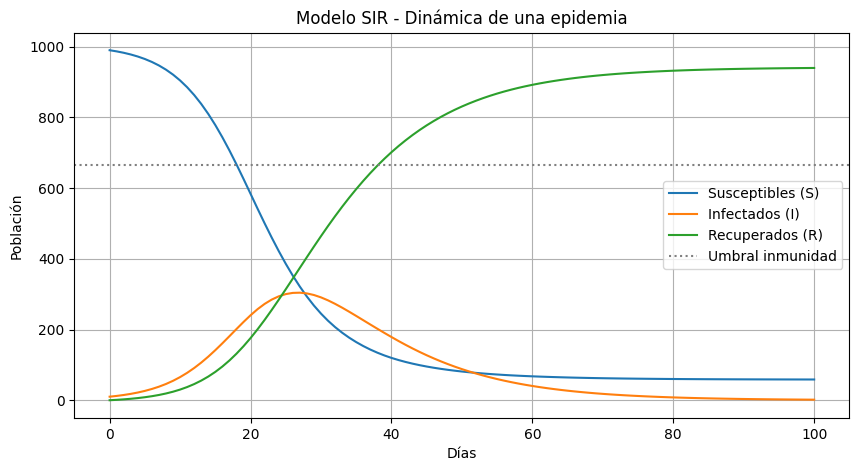

R‚ÇÄ = 3.00
Umbral de inmunidad de grupo ‚âà 66.67%


In [1]:
# Pr√°ctica - Simulaci√≥n del modelo SIR
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Par√°metros iniciales
S0, I0, R0 = 990, 10, 0
beta = 0.3    # tasa de infecci√≥n
mu = 0.1      # tasa de recuperaci√≥n
N = S0 + I0 + R0

def sir_model(t, y):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Simulaci√≥n sin vacunaci√≥n
t_span = [0, 100]
t_eval = np.linspace(*t_span, 101)
sol = solve_ivp(sir_model, t_span, [S0, I0, R0], t_eval=t_eval)
S, I, R = sol.y

# Calcular R0 y umbral de inmunidad
R_0 = beta / mu
umbral_inmunidad = 1 - 1/R_0

# Graficar
plt.figure(figsize=(10,5))
plt.plot(t_eval, S, label='Susceptibles (S)')
plt.plot(t_eval, I, label='Infectados (I)')
plt.plot(t_eval, R, label='Recuperados (R)')
plt.axhline(y=N * (1 - 1/R_0), color='gray', linestyle=':', label='Umbral inmunidad')
plt.title('Modelo SIR - Din√°mica de una epidemia')
plt.xlabel('D√≠as')
plt.ylabel('Poblaci√≥n')
plt.legend()
plt.grid(True)
plt.show()

print(f"R‚ÇÄ = {R_0:.2f}")
print(f"Umbral de inmunidad de grupo ‚âà {umbral_inmunidad:.2%}")

√öltimo prompt utilizado:

‚Äú¬øPara qu√© sirve solve_ivp y c√≥mo se integra con esta librer√≠a?‚Äù

Funcion√≥:
Este prompt me ayud√≥ a entender que b√°sicamente es una funci√≥n de SciPy que resuelve ecuaciones diferenciales, como las del modelo SIR. Me explic√≥ c√≥mo se usa, qu√© argumentos necesita y c√≥mo se conecta con el sistema din√°mico que simula la propagaci√≥n de una epidemia.

An√°lisis de la soluci√≥n:
La soluci√≥n me mostr√≥ que esta librer√≠a evita implementar m√©todos como Euler o Runge-Kutta manualmente, resolviendo bastante bien el sistema SIR.